<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Hotel_Dataset_Word2Vec_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
nltk.download('stopwords')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving hotel_data_clean.csv to hotel_data_clean.csv


In [3]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['hotel_data_clean.csv']))

In [4]:
data.head()

,Index,Hotel_id,Hotel,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment,User_id
0,0,0,La Quinta,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,hotel dump upon checking told place booked fol...,1.0,"['hotel', 'dump', 'upon', 'checking', 'told', ...",Negative,15400
1,1,1,The Point,How to Feel like you are truly Royalty!,DrThought,After having stayed at The Point for five days...,stayed point five days back june 2011 wife ele...,5.0,"['stayed', 'point', 'five', 'days', 'back', 'j...",Positive,3702
2,2,1,The Point,Not to be missed,Dushi110,The Point exceeds perfection. From the moment ...,point exceeds perfection moment arrive prepare...,5.0,"['point', 'exceeds', 'perfection', 'moment', '...",Positive,3738
3,3,1,The Point,The most amazing place....,GracieLouNY,My review is long overdue but I tell so many p...,review long overdue tell many people place fel...,5.0,"['review', 'long', 'overdue', 'tell', 'many', ...",Positive,4593
4,4,1,The Point,Lack of maintenance,Guillen,We were picked up from the airport in a car wh...,picked airport car vacuum cleaned long time mi...,2.0,"['picked', 'airport', 'car', 'vacuum', 'cleane...",Negative,4657


In [5]:
# Checking for missing values
pd.isnull(data).any()

Index         False
Hotel_id      False
Hotel         False
Title          True
Users         False
Reviews        True
Text_Clean     True
Rating         True
tokens        False
Sentiment     False
User_id       False
dtype: bool

In [6]:
#Filing the missing Review with 'na'
data['Reviews'] = data['Reviews'].fillna('').apply(str)
data['Title'] = data['Title'].fillna('').apply(str)
data['Text_Clean'] = data['Text_Clean'].fillna('').apply(str)

In [7]:
data = data.dropna()
data = data.reset_index(drop=True)
print('Shape of dataset ',data.shape)
print(data.columns)
print('No. of unique classes',len(set(data['Sentiment'])))

Shape of dataset  (24151, 11)
Index(['Index', 'Hotel_id', 'Hotel', 'Title', 'Users', 'Reviews', 'Text_Clean',
       'Rating', 'tokens', 'Sentiment', 'User_id'],
      dtype='object')
No. of unique classes 2


In [8]:
data.Text_Clean=data.Text_Clean.astype(str)


In [9]:
X = data['Text_Clean']
y = data['Sentiment']

In [10]:
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))

In [11]:
y

array([0, 1, 1, ..., 0, 1, 0])

In [12]:
data['Text_Clean'][:5]


0    hotel dump upon checking told place booked fol...
1    stayed point five days back june 2011 wife ele...
2    point exceeds perfection moment arrive prepare...
3    review long overdue tell many people place fel...
4    picked airport car vacuum cleaned long time mi...
Name: Text_Clean, dtype: object

In [13]:

from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 43606 unique tokens. 


In [15]:
# Each number is the index of the word in the order of word in original text
sequences[0]

[1,
 2387,
 319,
 464,
 173,
 21,
 136,
 1198,
 746,
 12888,
 1198,
 10620,
 2284,
 5636,
 84,
 2,
 257,
 1044,
 575,
 39,
 108,
 531,
 1,
 646,
 1657,
 931,
 575,
 21,
 136,
 2,
 7424,
 343,
 1045,
 635,
 3285,
 3829,
 356,
 343,
 931,
 1204,
 715,
 305,
 499,
 936,
 545,
 249,
 2498,
 106,
 17831,
 1037,
 2564,
 7424,
 17832,
 2226,
 343,
 17833,
 272,
 8167,
 2226,
 5338,
 4330,
 17834,
 188,
 1455,
 234,
 17835,
 1,
 2961,
 318,
 6,
 2,
 3143,
 1781,
 306,
 397,
 12,
 77,
 21,
 5339,
 40,
 8,
 206,
 42,
 122,
 4489,
 6405,
 2195,
 1622,
 1934,
 1198,
 746,
 12888,
 12,
 116,
 844,
 2251,
 139,
 21,
 193,
 17836,
 378]

In [16]:
word_index


{'hotel': 1,
 'room': 2,
 'stay': 3,
 'staff': 4,
 'great': 5,
 'clean': 6,
 'good': 7,
 'breakfast': 8,
 'us': 9,
 'nice': 10,
 'rooms': 11,
 'would': 12,
 'location': 13,
 'time': 14,
 'friendly': 15,
 'stayed': 16,
 'one': 17,
 'service': 18,
 'comfortable': 19,
 'area': 20,
 'place': 21,
 'well': 22,
 'night': 23,
 'back': 24,
 'desk': 25,
 'like': 26,
 'front': 27,
 'helpful': 28,
 'get': 29,
 'also': 30,
 'pool': 31,
 'next': 32,
 'bed': 33,
 'experience': 34,
 'best': 35,
 'really': 36,
 'could': 37,
 'thank': 38,
 'parking': 39,
 'free': 40,
 'enjoyed': 41,
 'day': 42,
 'close': 43,
 'much': 44,
 'food': 45,
 'small': 46,
 'didnt': 47,
 'everything': 48,
 'review': 49,
 'excellent': 50,
 'little': 51,
 'even': 52,
 'new': 53,
 'right': 54,
 'see': 55,
 'check': 56,
 'hope': 57,
 'inn': 58,
 'first': 59,
 'two': 60,
 'staying': 61,
 'visit': 62,
 'always': 63,
 'price': 64,
 'bathroom': 65,
 '2': 66,
 'made': 67,
 'family': 68,
 'wonderful': 69,
 'go': 70,
 'beds': 71,
 'restaur

In [17]:

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [18]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [19]:
print(sequences[0])


[1, 2387, 319, 464, 173, 21, 136, 1198, 746, 12888, 1198, 10620, 2284, 5636, 84, 2, 257, 1044, 575, 39, 108, 531, 1, 646, 1657, 931, 575, 21, 136, 2, 7424, 343, 1045, 635, 3285, 3829, 356, 343, 931, 1204, 715, 305, 499, 936, 545, 249, 2498, 106, 17831, 1037, 2564, 7424, 17832, 2226, 343, 17833, 272, 8167, 2226, 5338, 4330, 17834, 188, 1455, 234, 17835, 1, 2961, 318, 6, 2, 3143, 1781, 306, 397, 12, 77, 21, 5339, 40, 8, 206, 42, 122, 4489, 6405, 2195, 1622, 1934, 1198, 746, 12888, 12, 116, 844, 2251, 139, 21, 193, 17836, 378]


In [20]:
word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(9239477, 10251380)

In [21]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['feel', 'good', 'hotel', 'cheap', 'junk', 'bad', 'great','price','love']}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'bad': ['terrible', 'horrible', 'awful', 'ok', 'negative'],
 'cheap': ['budget', 'wise', 'inexpensive', 'fancy', 'frills'],
 'feel': ['felt', 'cruel', 'feels', 'homegrounds', 'assent'],
 'good': ['decent', 'great', 'nice', 'excellent', 'ok'],
 'great': ['excellent', 'fantastic', 'good', 'wonderful', 'amazing'],
 'hotel': ['place', 'property', 'hotels', 'motel', 'however'],
 'junk': ['restropub', 'nabayoti', 'mich', 'sri', 'mills'],
 'love': ['favorite', 'wentmore', 'experienceana', 'spilt', 'enjoy'],
 'price': ['rate', 'prices', 'rates', '5500', 'cost']}

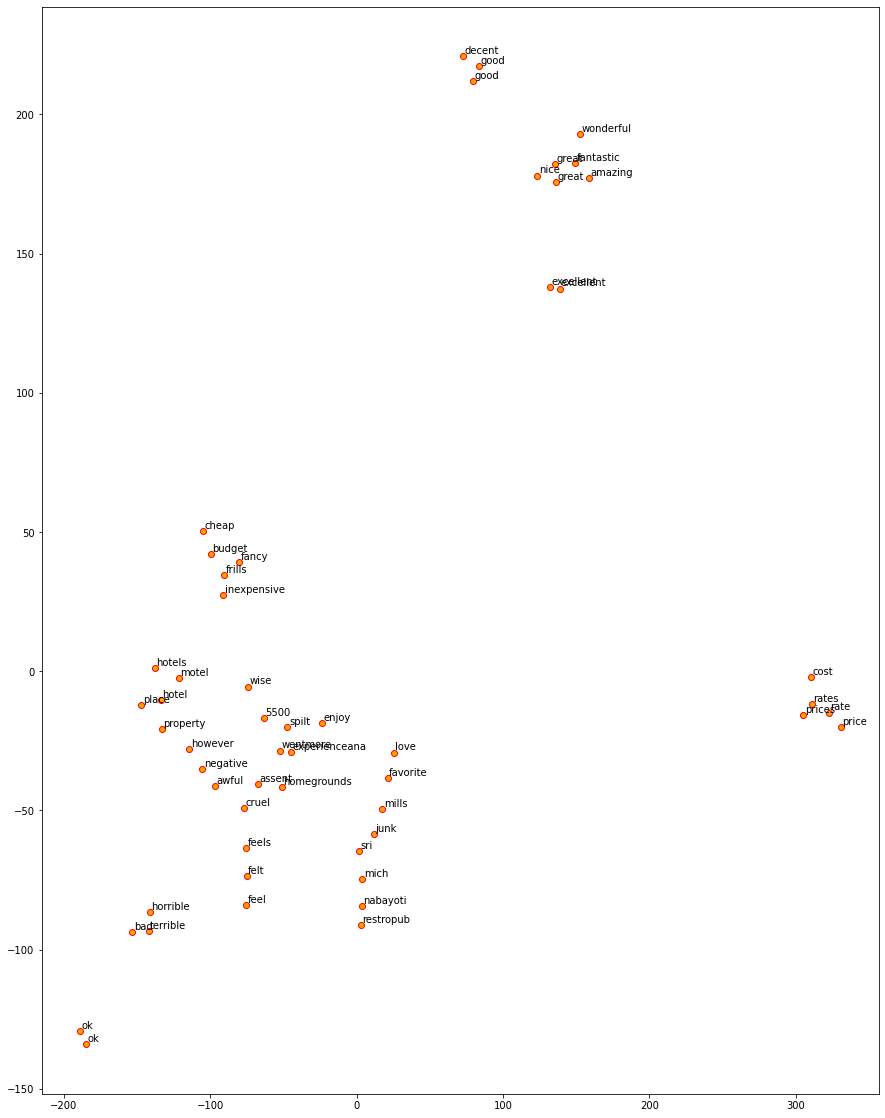

In [22]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 20))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [23]:
len(word_index.keys())


43606

In [24]:
len(word2vec.wv.vocab)


43606

In [25]:
max_length = 200 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 6000
validation_samples = 2933
data = pad_sequences(sequences, maxlen=max_length)

#labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)

Shape of data tensor: (24151, 200)
Shape of label tensor: (24151,)
Shape of training data:  (6000, 200)
Shape of validation data:  (2933, 200)


In [26]:

embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [27]:
embedding_matrix.shape


(43607, 100)

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          4360700   
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                640032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,000,765
Trainable params: 5,000,765
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 2s 13ms/step - loss: 0.6281 - acc: 0.7227 - val_loss: 0.5887 - val_acc: 0.7477
Epoch 2/10
188/188 [==============================] - 2s 12ms/step - loss: 0.4568 - acc: 0.7738 - val_loss: 0.6768 - val_acc: 0.7143
Epoch 3/10
188/188 [==============================] - 2s 12ms/step - loss: 0.2758 - acc: 0.8832 - val_loss: 0.8764 - val_acc: 0.6938
Epoch 4/10
188/188 [==============================] - 2s 12ms/step - loss: 0.1379 - acc: 0.9515 - val_loss: 1.1357 - val_acc: 0.6444
Epoch 5/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0676 - acc: 0.9822 - val_loss: 1.4721 - val_acc: 0.6679
Epoch 6/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0441 - acc: 0.9912 - val_loss: 1.7050 - val_acc: 0.6522
Epoch 7/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0340 - acc: 0.9918 - val_loss: 1.9371 - val_acc: 0.6505
Epoch 8/10
188/188 [==============================] - 3s 14ms/step - 

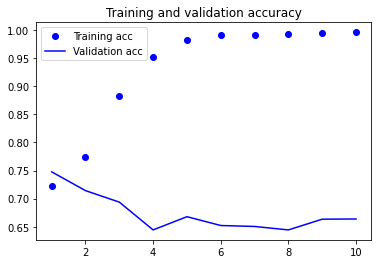

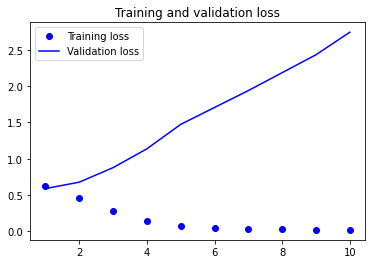

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()